In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Ankita dhiman\Downloads\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# KMEANS

In [3]:
from sklearn.cluster import KMeans

In [12]:
X=pd.DataFrame(df.iloc[:,[5,6,7]])
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [15]:
X.columns=['math_score','reading_score','writing_score']
X

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [32]:
sse = []
k_rnge = range(1,10)
for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
sse

[673318.6020000001,
 281958.4320223451,
 177501.36902246746,
 136370.91584509527,
 111309.68435889503,
 97399.39143147305,
 86742.15096886041,
 76519.35242464251,
 68516.37150882414]

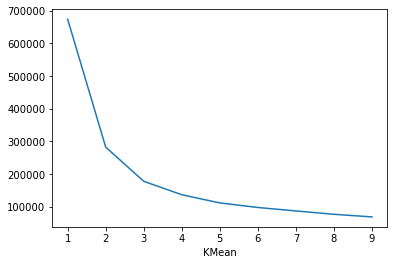

In [53]:
plt.xlabel('KMean')
plt.plot(k_rnge,sse)

In [50]:
y_pred = KMeans(n_clusters=3, random_state=1).fit_predict(X)
y_pred

array([0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,

In [34]:
km=KMeans(n_clusters=3)
km.fit(X)
km.labels_

array([2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 1,

Text(0.5, 1.0, 'KMEANS3')

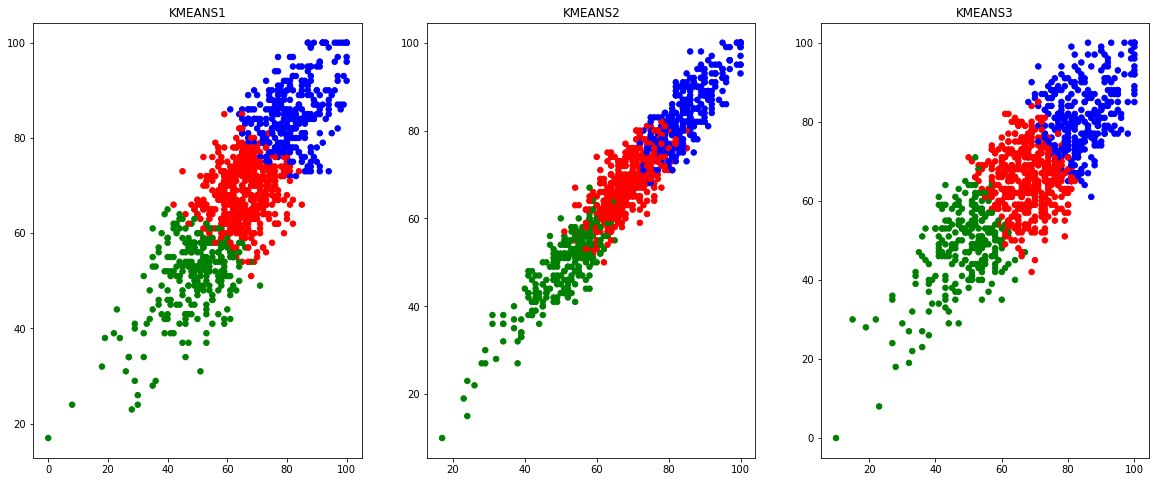

In [54]:
colormap=np.array(['red','blue','green'])
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.scatter(X.math_score,X.reading_score,c=colormap[y_pred],s=30)
plt.title('KMEANS1')
plt.subplot(1,3,2)
plt.scatter(X.reading_score,X.writing_score, c=colormap[y_pred],s=30)
plt.title('KMEANS2')
plt.subplot(1,3,3)
plt.scatter(X.writing_score,X.math_score,c=colormap[y_pred],s=30)
plt.title('KMEANS3')

# hierarchical clustering

In [62]:
X=df.iloc[:,[5,6,7]].values
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [58]:
import scipy.cluster.hierarchy as sch

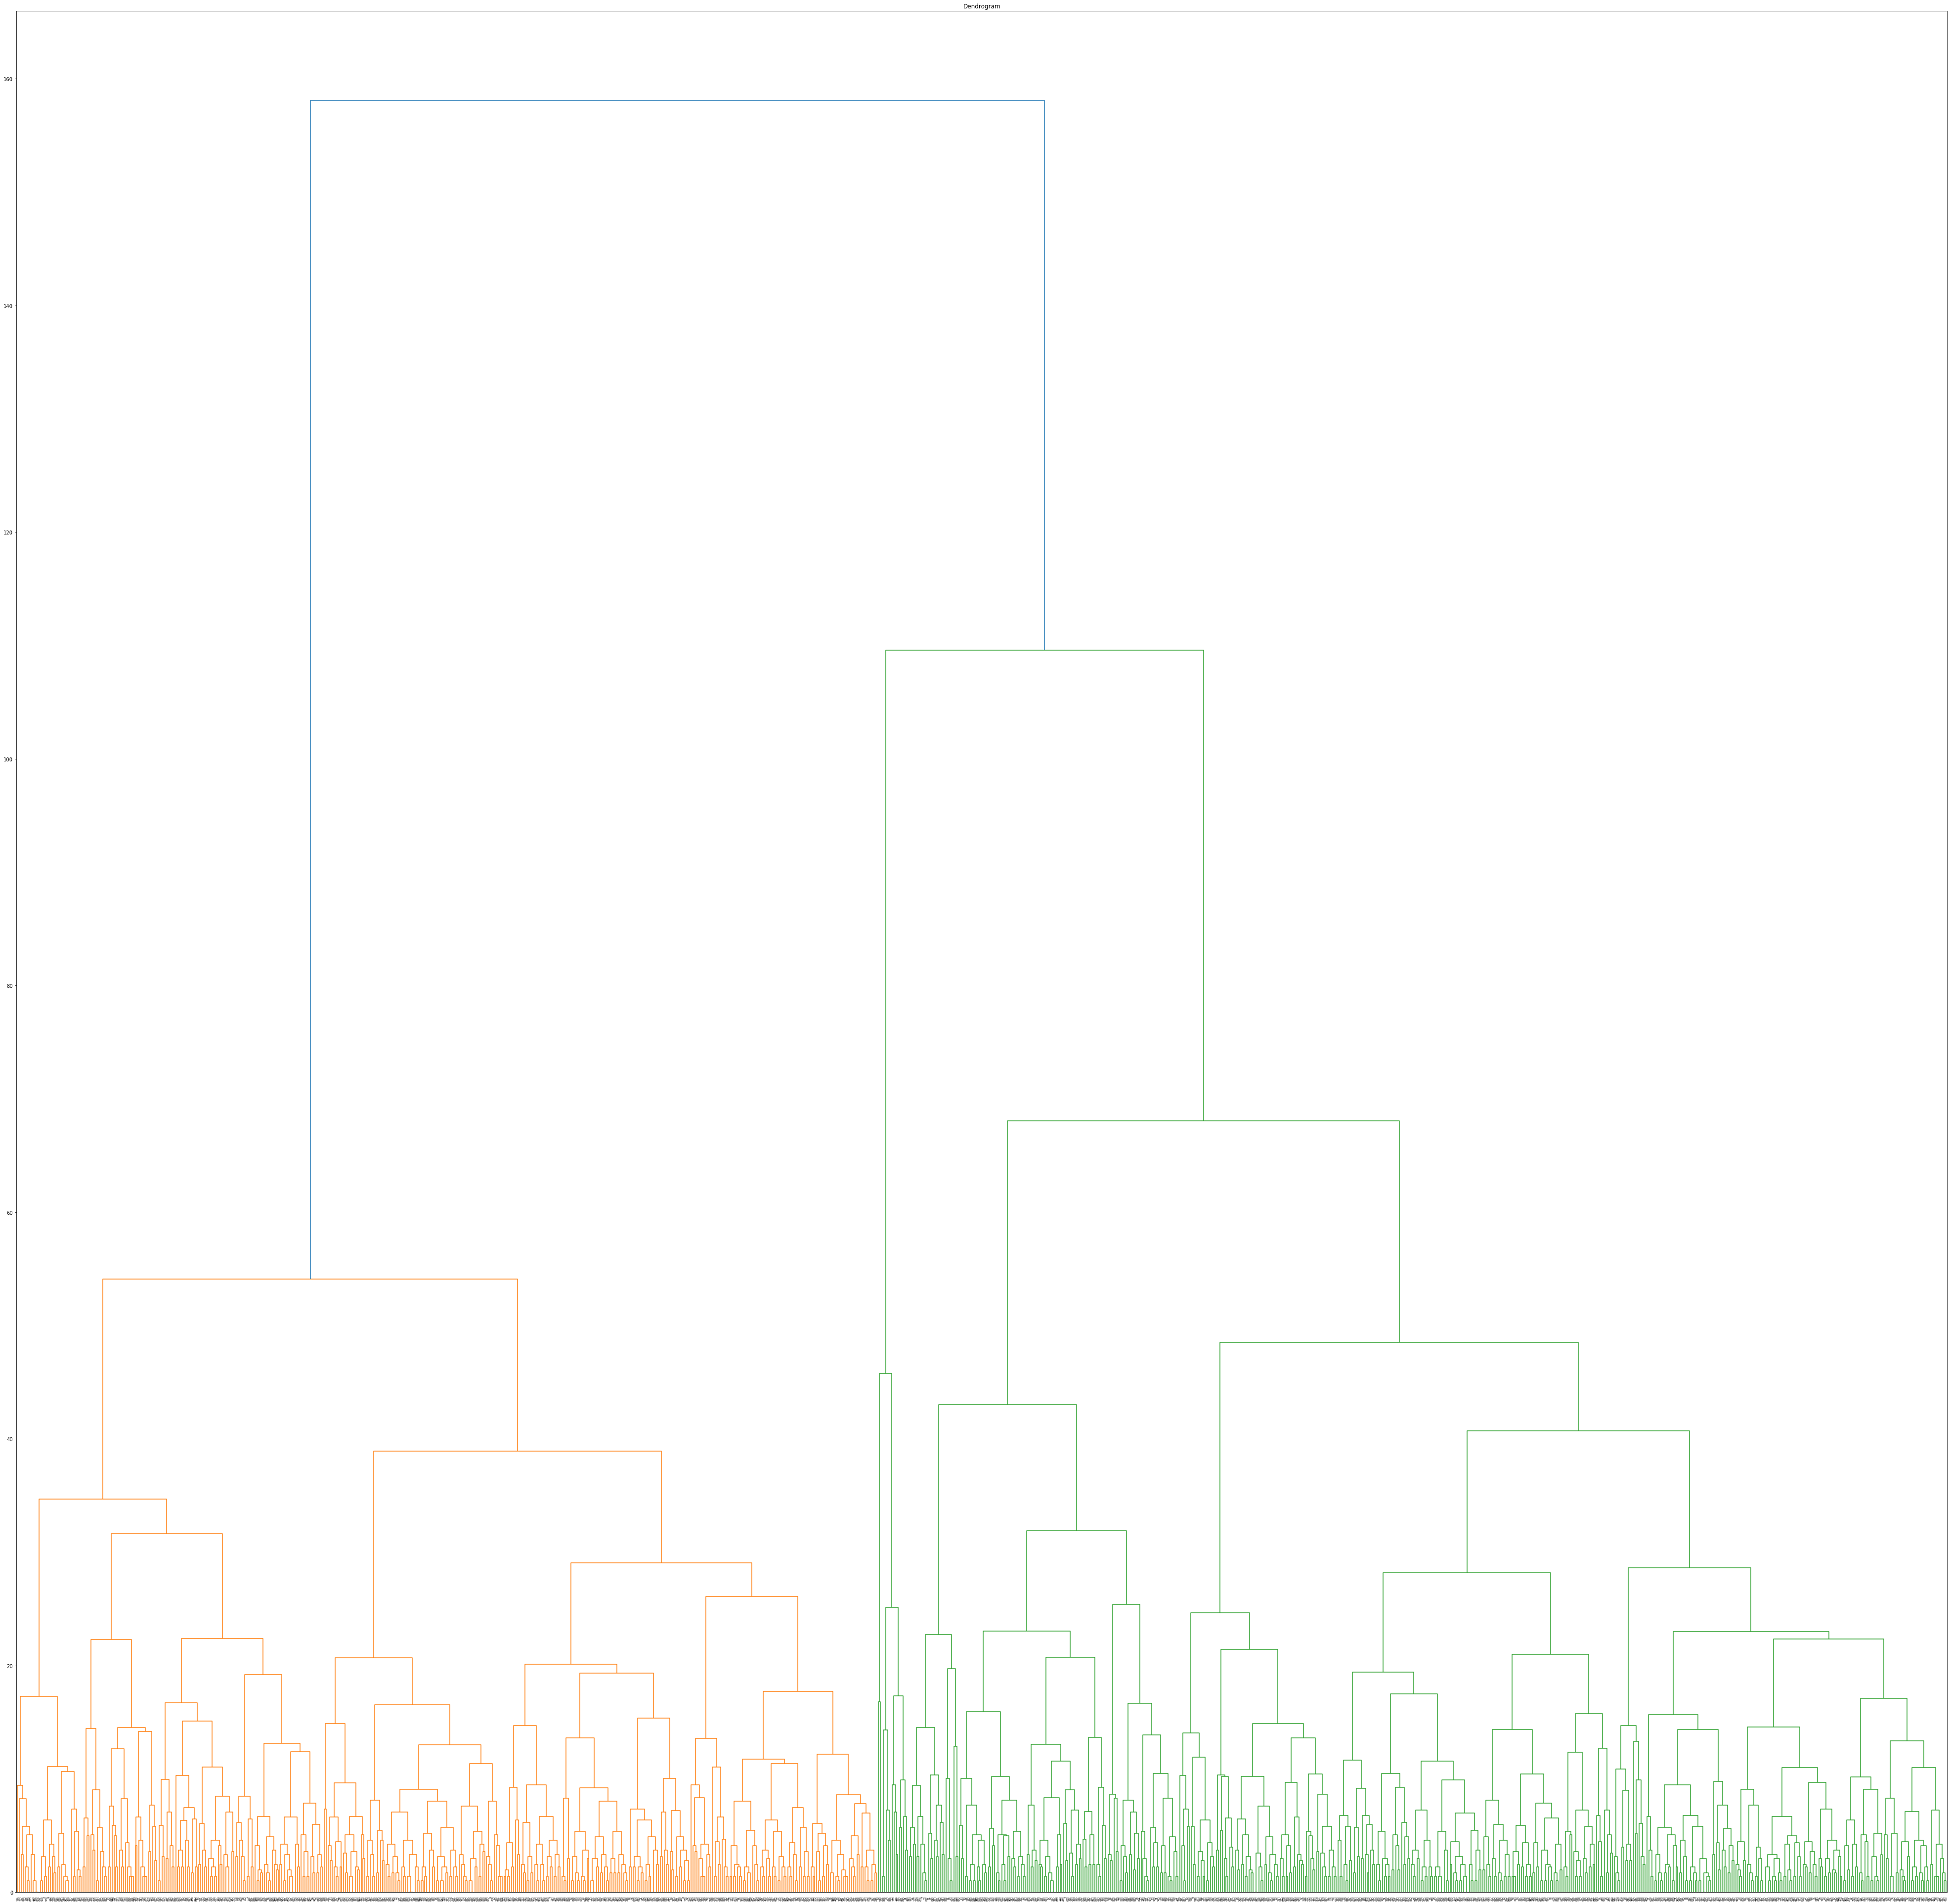

In [68]:
plt.figure(figsize=(70,70))
dendrogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title('Dendrogram')
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering
ab=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [70]:
y_ab=ab.fit_predict(X)
y_ab

array([1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 0, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 2, 3, 2, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1,
       1, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1,
       3, 2, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3, 2, 1, 3, 1, 1, 1, 2, 3, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 2,
       1, 3, 1, 1, 1, 1, 1, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 2, 3,
       2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 3, 1, 3, 2, 1, 2,
       1, 3, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3,
       1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1,

In [71]:
len(X)

1000

In [72]:
len(y_ab)

1000

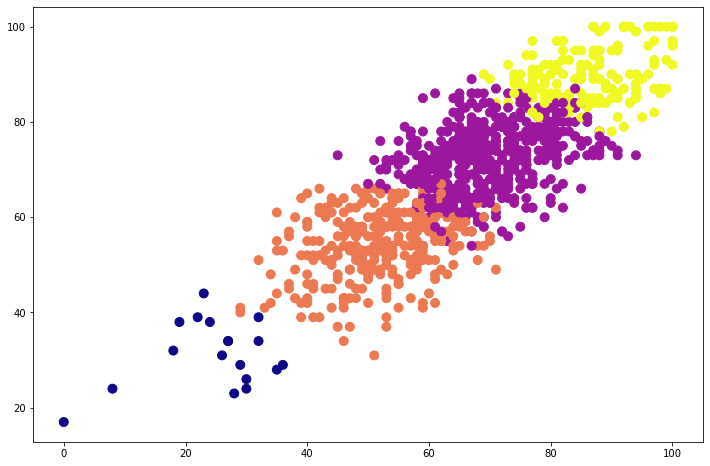

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],c=y_ab, cmap='plasma',s=80)

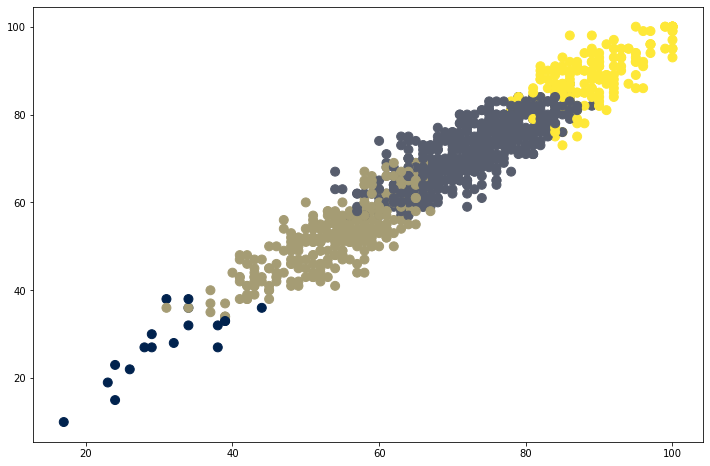

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 1], X[:, 2],c=y_ab, cmap='cividis',s=80)

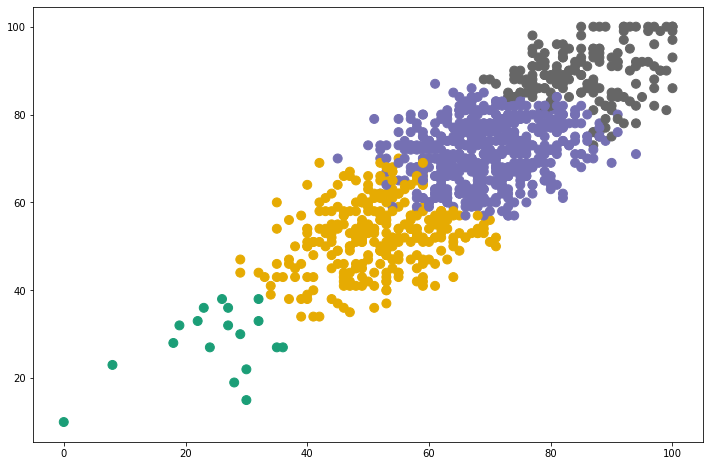

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 2],c=y_ab, cmap='Dark2',s=80)

# DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

In [103]:
X=df.iloc[:,[5,6,7]].values
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [137]:
dbscan=DBSCAN(eps = 4, min_samples = 8)
clusters=dbscan.fit_predict(X)

In [138]:
clusters

array([ 0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1,  2,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1,  0,  0,  2, -1, -1,  0,  0,  0,  0,  2,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  3,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0

Text(0.5, 1.0, 'DBSCAN')

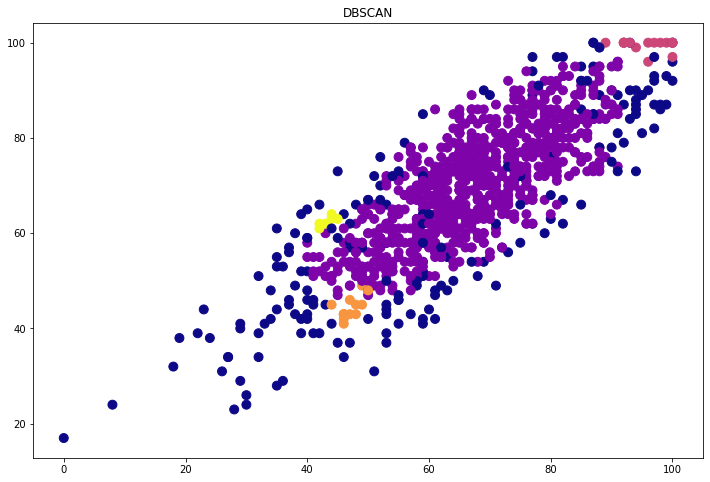

In [139]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

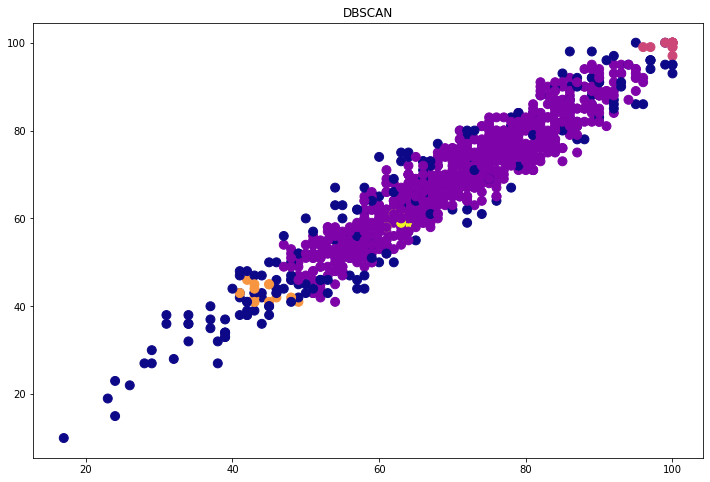

In [140]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 1], X[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

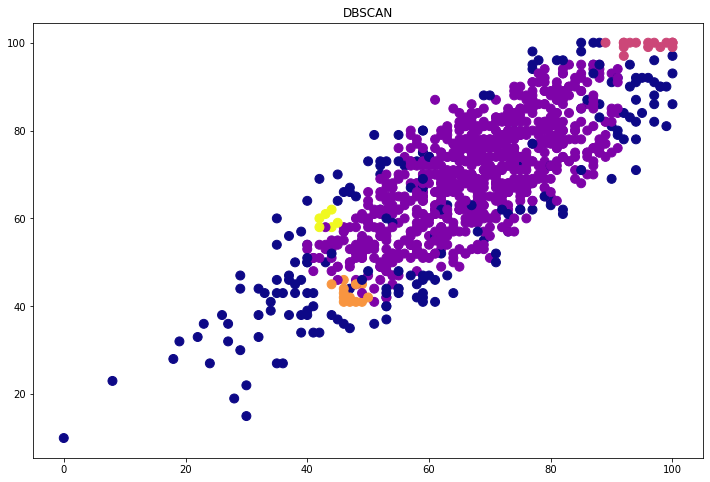

In [141]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')